In [334]:
%load_ext autoreload
%autoreload 2
from perceptron import Perceptron, PerceptronOptimizer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Testing the perceptron.py file with a Minimal Training Loop

In the training loop, we will repeat the procedure for a specified number of times (or until convergence).

This was taken from the perceptron lecture notes:

In [335]:
import torch
torch.manual_seed(12345)


def perceptron_data(n_points = 300, noise = 0.2, p_dims = 2):
    
    y = torch.arange(n_points) >= int(n_points/2)
    X = y[:, None] + torch.normal(0.0, noise, size = (n_points,p_dims))
    X = torch.cat((X, torch.ones((X.shape[0], 1))), 1)

    # convert y from {0, 1} to {-1, 1}
    y = 2*y - 1

    return X, y
X, y = perceptron_data(n_points = 300, noise = 0.2)


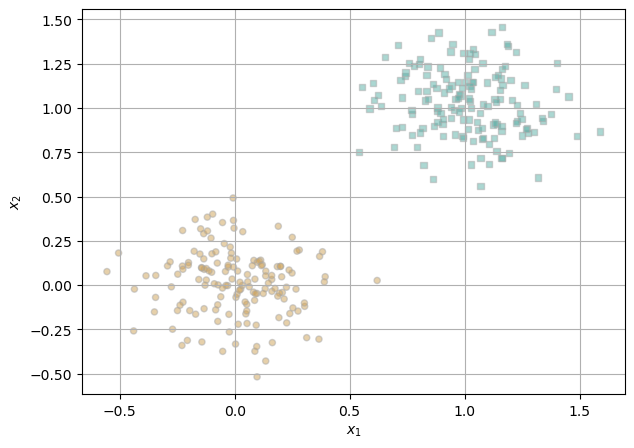

In [336]:
from matplotlib import pyplot as plt

def plot_perceptron_data(X, y, ax):
    assert X.shape[1] == 3, "This function only works for data created with p_dims == 2"
    targets = [-1, 1]
    markers = ["o" , ","]
    for i in range(2):
        ix = y == targets[i]
        ax.scatter(X[ix,0], X[ix,1], s = 20,  c = y[ix], facecolors = "none", edgecolors = "darkgrey", cmap = "BrBG", vmin = -2, vmax = 2, alpha = 0.5, marker = markers[i])
    ax.set(xlabel = r"$x_1$", ylabel = r"$x_2$")

fig, ax = plt.subplots(1, 1)
X, y = perceptron_data()
plot_perceptron_data(X, y, ax)
plt.grid(True)

This was taken from the perceptron lecture notes:

In [337]:
# instantiate a model and an optimizer
p = Perceptron()
opt = PerceptronOptimizer(p)

loss = 1.0

# for keeping track of loss values
loss_vec = []

n = X.size()[0]

while loss > 0 : # dangerous -- only terminates if data is linearly separable
    
    # not part of the update: just for tracking our progress    
    loss = p.loss(X, y)
    loss_vec.append(loss)
    # pick a random data point
    i = torch.randint(n, size = (1,))
    
    x_i = X[[i],:]
    y_i = y[i]
    # perform a perceptron update using the random data point
    opt.step(x_i, y_i)


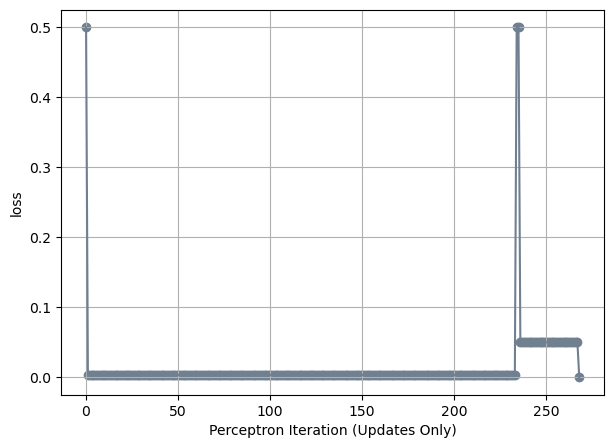

In [338]:
plt.plot(loss_vec, color = "slategrey")
plt.scatter(torch.arange(len(loss_vec)), loss_vec, color = "slategrey")
labs = plt.gca().set(xlabel = "Perceptron Iteration (Updates Only)", ylabel = "loss")
plt.grid(True)

### Part B: Experiments

Using 2d data like the data in the example above, if the data is linearly separable then the perceptron algorithm converges to weight vector w describing a separating line (provided that the maximum number of iterations is large enough).
 
Taken from my Logistic Regression blog post where I edited Phil's code from the notes:

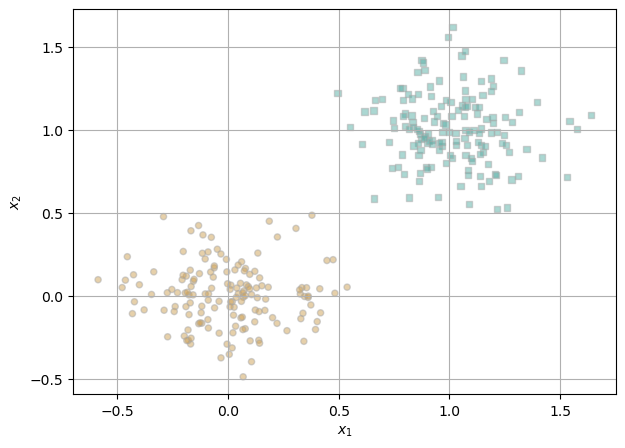

In [339]:
def perceptron_data(n_points = 300, noise = 0.2, p_dims = 2):
    
    y = torch.arange(n_points) >= int(n_points/2)
    X = y[:, None] + -torch.normal(0.0, noise, size = (n_points,p_dims))
    X = torch.cat((X, torch.ones((X.shape[0], 1))), 1)

    # convert y from {0, 1} to {-1, 1}
    y = 2*y - 1

    return X, y

X, y = perceptron_data(n_points = 300, noise = 0.2)

def plot_perceptron_data(X, y, ax):
    assert X.shape[1] == 3, "This function only works for data created with p_dims == 2"
    targets = [-1, 1]
    markers = ["o" , ","]
    for i in range(2):
        ix = y == targets[i]
        ax.scatter(X[ix,0], X[ix,1], s = 20,  c = y[ix], facecolors = "none", edgecolors = "darkgrey", cmap = "BrBG", vmin = -2, vmax = 2, alpha = 0.5, marker = markers[i])
    ax.set(xlabel = r"$x_1$", ylabel = r"$x_2$")

fig, ax = plt.subplots(1, 1)
X, y = perceptron_data()
plt.grid(True)
plot_perceptron_data(X, y, ax)

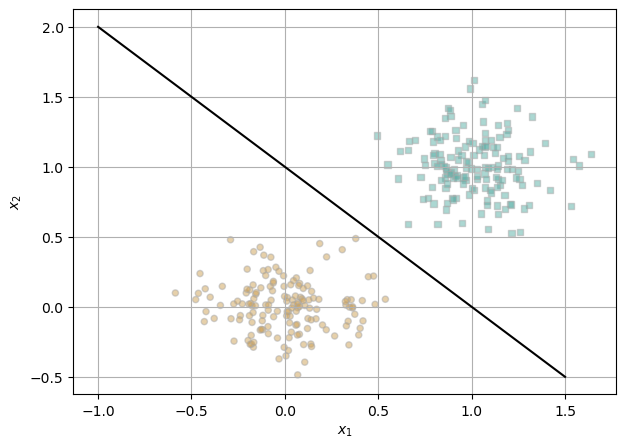

In [340]:
def draw_line(w, x_min, x_max, ax, **kwargs):
    w_ = w.flatten()
    x = torch.linspace(x_min, x_max, 101)
    y = -(w_[0]*x + w_[2])/w_[1]
    l = ax.plot(x, y, **kwargs)

fig, ax = plt.subplots(1, 1)
plot_perceptron_data(X, y, ax)

w_1 = torch.Tensor([1,  1, -1]) 

draw_line(w_1, x_min = -1, x_max = 1.5, ax = ax, color = "black")
plt.grid(True)

This was taken from Phil's perceptron notes: 

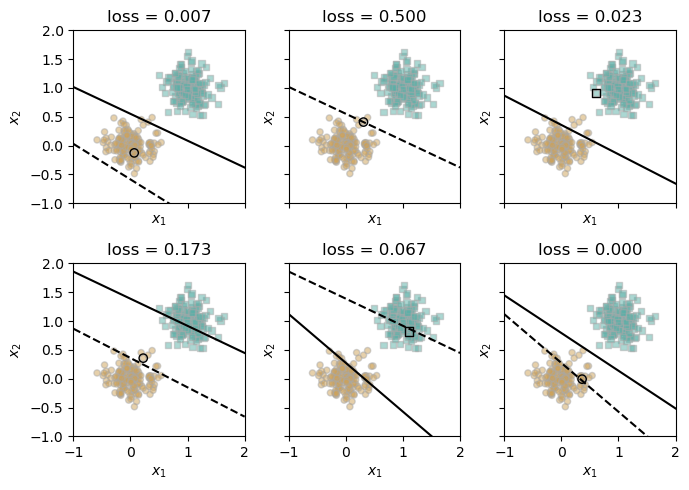

In [341]:
torch.manual_seed(123456)

# initialize a perceptron
p = Perceptron()
opt = PerceptronOptimizer(p)
p.loss(X, y)

# set up the figure
plt.rcParams["figure.figsize"] = (7, 5)
fig, axarr = plt.subplots(2, 3, sharex = True, sharey = True)
markers = ["o", ","]
marker_map = {-1 : 0, 1 : 1}

# initialize for main loop
current_ax = 0
loss = 1
loss_vec = []
while loss > 0:

    ax = axarr.ravel()[current_ax]

    # save the old value of w for plotting later
    old_w = torch.clone(p.w)

    # make an optimization step -- this is where the update actually happens
    # now p.w is the new value
    i = torch.randint(n, size = (1,))
    
    x_i = X[[i],:]
    y_i = y[i]
    # perform a perceptron update using the random data point
    local_loss = opt.step(x_i, y_i)

    if local_loss > 0:
        #ax.clear()
        plot_perceptron_data(X, y, ax)
        draw_line(old_w, x_min = -1, x_max = 2, ax = ax, color = "black", linestyle = "dashed")
        loss = p.loss(X, y).item()
        loss_vec.append(loss)
        draw_line(p.w, x_min = -1, x_max = 2, ax = ax, color = "black")
        ax.scatter(X[i,0],X[i,1], color = "black", facecolors = "none", edgecolors = "black", marker = markers[marker_map[y[i].item()]])
        ax.set_title(f"loss = {loss:.3f}")
        ax.set(xlim = (-1, 2), ylim = (-1, 2))
        current_ax += 1
        #current_ax = min(5, current_ax + 1)
plt.tight_layout()


### Experiment 2:

Exploring when data is not linearly separable.

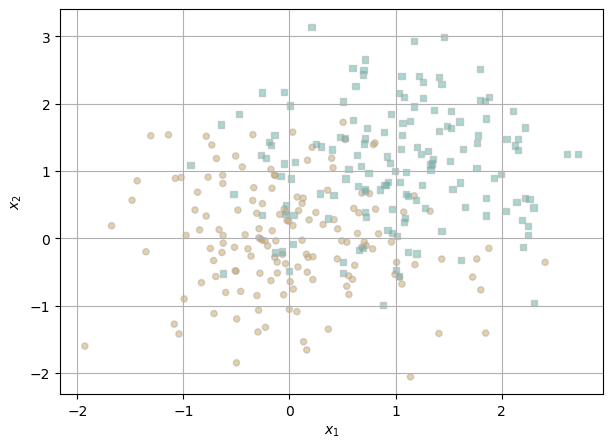

In [342]:
torch.manual_seed(12345)

fig, ax = plt.subplots(1, 1)
X, y = perceptron_data(noise = 0.8)
plot_perceptron_data(X, y, ax)
plt.grid(True)

In [343]:
def draw_line(w, x_min, x_max, ax, **kwargs):
    w_ = w.flatten()
    x = torch.linspace(x_min, x_max, 101)
    y = -(w_[0]*x + w_[2])/w_[1]
    l = ax.plot(x, y, **kwargs)


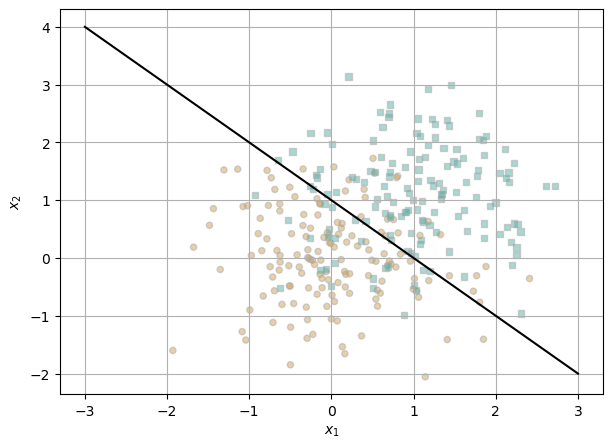

In [344]:
# instantiate a model and an optimizer
p = Perceptron()
opt = PerceptronOptimizer(p)

loss = 1.0
# for keeping track of loss values
loss_vec = []

n = X.size()[0]

num_iter = 1000
while loss > 0 and num_iter > 0: # dangerous -- only terminates if data is linearly separable
    
    # not part of the update: just for tracking our progress
    loss = p.loss(X, y)
    loss_vec.append(loss)
    # print(loss)
    # pick a random data point
    i = torch.randint(n, size = (1,))
    
    x_i = X[[i],:]
    y_i = y[i]
    # perform a perceptron update using the random data point
    opt.step(x_i, y_i)
    num_iter = num_iter - 1

fig, ax = plt.subplots(1, 1)
plot_perceptron_data(X, y, ax)

draw_line(w_1, x_min = -3, x_max = 3, ax = ax, color = "black")
plt.grid(True)


Here, we see the the data is not linearly separable as the points are scattered within each other.

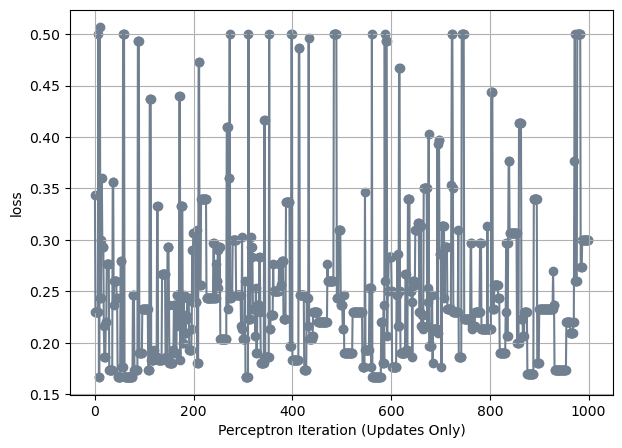

In [345]:
plt.plot(loss_vec, color = "slategrey")
plt.scatter(torch.arange(len(loss_vec)), loss_vec, color = "slategrey")
labs = plt.gca().set(xlabel = "Perceptron Iteration (Updates Only)", ylabel = "loss")
plt.grid(True)

The graph above demonstrates the evolution of the loss over training. As seen, it never reaches 0.0 in the 1000 iterations, so if there was no limit, it would keep running.

In [346]:

X, y = perceptron_data(n_points = 300, noise = 0.5, p_dims=5)

# instantiate a model and an optimizer
p = Perceptron()
opt = PerceptronOptimizer(p)

loss = 1.0

# for keeping track of loss values
loss_vec = []

n = X.size()[0]

while loss > 0 : # dangerous -- only terminates if data is linearly separable
    
    # not part of the update: just for tracking our progress
    loss = p.loss(X, y)
    loss_vec.append(loss)
    # pick a random data point
    i = torch.randint(n, size = (1,))
    
    x_i = X[[i],:]
    y_i = y[i]
    # perform a perceptron update using the random data point
    opt.step(x_i, y_i)


Next, I will show the evolution of the score over the training period: 

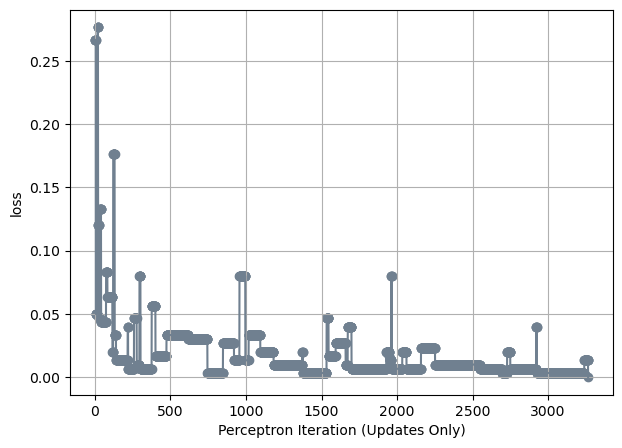

In [347]:
plt.plot(loss_vec, color = "slategrey")
plt.scatter(torch.arange(len(loss_vec)), loss_vec, color = "slategrey")
labs = plt.gca().set(xlabel = "Perceptron Iteration (Updates Only)", ylabel = "loss")
plt.grid(True)

# Part C: Minibatch Perceptron

The mini-batch perceptron algorithm computes an update using k points at once, rather than a single point. In each step t:


In [348]:
torch.manual_seed(123456)

def mini_batch(k):   
    # instantiate a model and an optimizer
    p = Perceptron()
    opt = PerceptronOptimizer(p)

    loss = 1.0

    # for keeping track of loss values
    loss_vec = []

    n = X.size()[0]

    while loss > 0 : # dangerous -- only terminates if data is linearly separable
        
        # not part of the update: just for tracking our progress
        loss = p.loss(X, y)
        loss_vec.append(loss)
        # pick a random data point
        i = torch.randint(n, size = (1,))
        
        #k = 10
        ix = torch.randperm(X.size(0))[:k]
        x_batch = (X[ix,:])
        y_batch = (y[ix])
        # perform a perceptron update using the random data point
        opt.mini_step(x_batch, y_batch)
    return loss_vec

## Minibatch Perceptron Experiments

### Experiment 1:
When k = 1, minibatch perceptron performs similarly to regular perceptron:

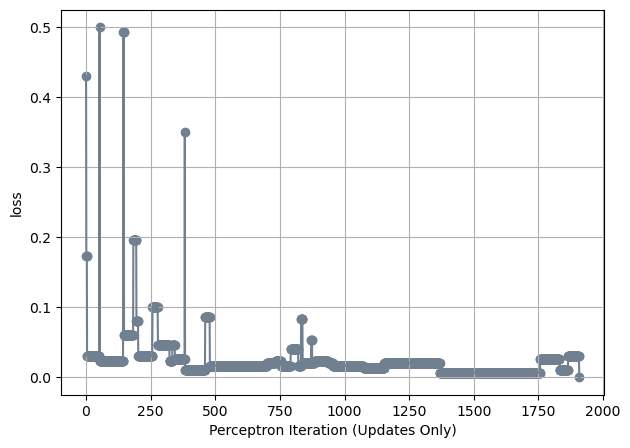

In [349]:
loss_vec = mini_batch(k=1)

plt.plot(loss_vec, color = "slategrey")
plt.scatter(torch.arange(len(loss_vec)), loss_vec, color = "slategrey")
labs = plt.gca().set(xlabel = "Perceptron Iteration (Updates Only)", ylabel = "loss")
plt.grid(True)

## Experiment 2: 
When k = 10, minibatch perceptron can still find a separating line in 2d.

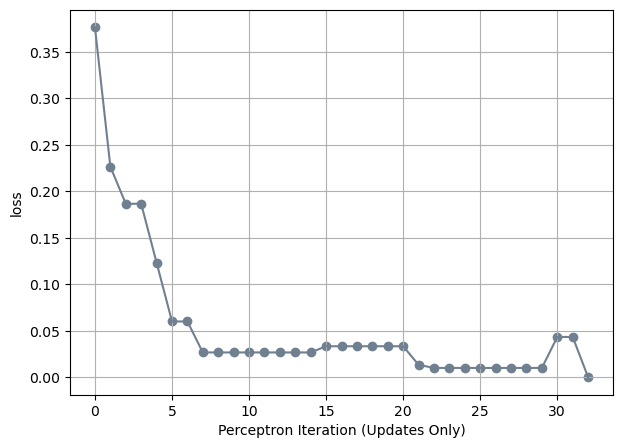

In [350]:
loss_vec = mini_batch(k=10)

plt.plot(loss_vec, color = "slategrey")
plt.scatter(torch.arange(len(loss_vec)), loss_vec, color = "slategrey")
labs = plt.gca().set(xlabel = "Perceptron Iteration (Updates Only)", ylabel = "loss")
plt.grid(True)

## Experiment 3:
When k = n (that is, the batch size is the size of the entire data set), minibatch perceptron can converge even when the data is not linearly separable, provided that the learning rate alpha is small enough

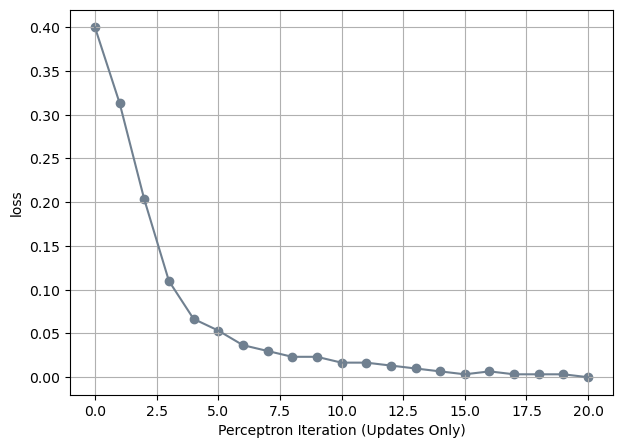

In [351]:
loss_vec = mini_batch(k=X.size()[0]) # k = n(num of points in data set)

plt.plot(loss_vec, color = "slategrey")
plt.scatter(torch.arange(len(loss_vec)), loss_vec, color = "slategrey")
labs = plt.gca().set(xlabel = "Perceptron Iteration (Updates Only)", ylabel = "loss")
plt.grid(True)